# Wrangling Missing Data

In [1]:
#import importants
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import data
houses = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print(houses.columns)
print(test.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
houses.ExterQual.unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [5]:
#map and change qualities and conditions
scale2_5 = {'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
scale5 = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
scale5na = {np.nan: 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
scale2_5na = {np.nan: 0, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
scale0245 = {np.nan: 0, 'Fa': 2, 'Gd': 4, 'Ex': 5}

houses['ExterQual'] = [scale2_5[item] for item in houses['ExterQual']]
houses['BsmtQual'] = [scale2_5na[item] for item in houses['BsmtQual']]
houses['KitchenQual'] = [scale2_5na[item] for item in houses['KitchenQual']]
houses['FireplaceQu'] = [scale5na[item] for item in houses['FireplaceQu']]
houses['ExterCond'] = [scale5na[item] for item in houses['ExterCond']]
houses['BsmtCond'] = [scale5na[item] for item in houses['BsmtCond']]
houses['GarageQual'] = [scale5na[item] for item in houses['GarageQual']]
houses['GarageCond'] = [scale5na[item] for item in houses['GarageCond']]
houses['PoolQC'] = [scale0245[item] for item in houses['PoolQC']]
houses['HeatingQC'] = [scale5[item] for item in houses['HeatingQC']]


In [6]:
#repeat on test set
test['ExterQual'] = [scale2_5[item] for item in test['ExterQual']]
test['BsmtQual'] = [scale2_5na[item] for item in test['BsmtQual']]
test['KitchenQual'] = [scale2_5na[item] for item in test['KitchenQual']]
test['FireplaceQu'] = [scale5na[item] for item in test['FireplaceQu']]
test['ExterCond'] = [scale5na[item] for item in test['ExterCond']]
test['BsmtCond'] = [scale5na[item] for item in test['BsmtCond']]
test['GarageQual'] = [scale5na[item] for item in test['GarageQual']]
test['GarageCond'] = [scale5na[item] for item in test['GarageCond']]
test['PoolQC'] = [scale0245[item] for item in test['PoolQC']]
test['HeatingQC'] = [scale5[item] for item in test['HeatingQC']]

In [7]:
houses.LotFrontage.fillna(houses.LotFrontage.mode()[0], inplace=True)
houses.LotFrontage.astype(int)
#repeat on test
test.LotFrontage.fillna(houses.LotFrontage.mode()[0], inplace=True)
test.LotFrontage.astype(int)

0        80
1        81
2        74
3        78
4        43
       ... 
1454     21
1455     21
1456    160
1457     62
1458     74
Name: LotFrontage, Length: 1459, dtype: int64

In [8]:
houses.MasVnrType.fillna(houses.MasVnrType.mode()[0], inplace=True)

#repeat on test
test.MasVnrType.fillna(houses.MasVnrType.mode()[0], inplace=True)

In [9]:
houses.MasVnrArea.fillna(0, inplace=True)
#repeat on test
test.MasVnrArea.fillna(0, inplace=True)


In [10]:
# from data descripion: Gd-Good Exposure, Av-Average Exposure (split levels or foyers typically score average or above), 
#Mn-Mimimum Exposure, No-No Exposure, NA-No Basement
scale_BE = {np.nan: 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}
houses['BsmtExposure'] = [scale_BE[item] for item in houses['BsmtExposure']]

#repeat on test
test['BsmtExposure'] = [scale_BE[item] for item in test['BsmtExposure']]

In [11]:
scale_BT = {np.nan: 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
houses['BsmtFinType1'] = [scale_BT[item] for item in houses['BsmtFinType1']]

#repeat on test
test['BsmtFinType1'] = [scale_BT[item] for item in test['BsmtFinType1']]

In [12]:
houses['BsmtFinType2'] = [scale_BT[item] for item in houses['BsmtFinType2']]

#repeat on test
test['BsmtFinType2'] = [scale_BT[item] for item in test['BsmtFinType2']]

In [13]:
houses.Fence.unique()


array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [14]:
scale_F = {np.nan: 0, 'MnPrv': 4 , 'GdWo': 2, 'GdPrv': 5, 'MnWw': 1}

houses['Fence'] = [scale_F[item] for item in houses['Fence']]

#repeat test
test['Fence'] = [scale_F[item] for item in test['Fence']]

In [15]:
houses.dropna(subset= ['Electrical'], inplace=True)

#repeat on test
test.dropna(subset= ['Electrical'], inplace=True)

In [16]:
scaleGF ={np.nan: 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}
houses.GarageFinish = [scaleGF[item] for item in houses.GarageFinish]

#repeat on test
test.GarageFinish = [scaleGF[item] for item in test.GarageFinish]

In [17]:
#chose to fill in years with the year the house was built. This is when the decition to not build a garage was made.
houses.loc[houses['GarageYrBlt'].isnull(), 'GarageYrBlt'] = houses['YearBuilt'].loc[houses['GarageYrBlt'].isnull()]
pd.to_numeric(houses['GarageYrBlt'], downcast='integer', errors='coerce')

#repeat on test
test.loc[test['GarageYrBlt'].isnull(), 'GarageYrBlt'] = test['YearBuilt'].loc[test['GarageYrBlt'].isnull()]
pd.to_numeric(test['GarageYrBlt'], downcast='integer', errors='coerce')

0       1961
1       1958
2       1997
3       1998
4       1992
        ... 
1454    1970
1455    1970
1456    1960
1457    1992
1458    1993
Name: GarageYrBlt, Length: 1459, dtype: int16

In [18]:
#missing int in test that arn't missing in train set
int0 = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea']

[test[column].fillna(0, inplace=True) for column in int0]


[None, None, None, None, None, None, None, None]

In [19]:
houses.select_dtypes([np.number]).info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   OverallQual    1459 non-null   int64  
 5   OverallCond    1459 non-null   int64  
 6   YearBuilt      1459 non-null   int64  
 7   YearRemodAdd   1459 non-null   int64  
 8   MasVnrArea     1459 non-null   float64
 9   ExterQual      1459 non-null   int64  
 10  ExterCond      1459 non-null   int64  
 11  BsmtQual       1459 non-null   int64  
 12  BsmtCond       1459 non-null   int64  
 13  BsmtExposure   1459 non-null   int64  
 14  BsmtFinType1   1459 non-null   int64  
 15  BsmtFinSF1     1459 non-null   int64  
 16  BsmtFinType2   1459 non-null   int64  
 17  BsmtFinSF2     1459 non-null   int64  
 18  BsmtUnfS

In [20]:
houses.select_dtypes(exclude=[np.number]).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1459 non-null   object
 1   Street         1459 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1459 non-null   object
 4   LandContour    1459 non-null   object
 5   Utilities      1459 non-null   object
 6   LotConfig      1459 non-null   object
 7   LandSlope      1459 non-null   object
 8   Neighborhood   1459 non-null   object
 9   Condition1     1459 non-null   object
 10  Condition2     1459 non-null   object
 11  BldgType       1459 non-null   object
 12  HouseStyle     1459 non-null   object
 13  RoofStyle      1459 non-null   object
 14  RoofMatl       1459 non-null   object
 15  Exterior1st    1459 non-null   object
 16  Exterior2nd    1459 non-null   object
 17  MasVnrType     1459 non-null   object
 18  Foundation     1459 non-null

In [21]:
test.select_dtypes([np.number]).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Data columns (total 52 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   OverallQual    1459 non-null   int64  
 5   OverallCond    1459 non-null   int64  
 6   YearBuilt      1459 non-null   int64  
 7   YearRemodAdd   1459 non-null   int64  
 8   MasVnrArea     1459 non-null   float64
 9   ExterQual      1459 non-null   int64  
 10  ExterCond      1459 non-null   int64  
 11  BsmtQual       1459 non-null   int64  
 12  BsmtCond       1459 non-null   int64  
 13  BsmtExposure   1459 non-null   int64  
 14  BsmtFinType1   1459 non-null   int64  
 15  BsmtFinSF1     1459 non-null   float64
 16  BsmtFinType2   1459 non-null   int64  
 17  BsmtFinSF2     1459 non-null   float64
 18  BsmtUnfS

In [22]:
test.select_dtypes(exclude=[np.number]).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1455 non-null   object
 1   Street         1459 non-null   object
 2   Alley          107 non-null    object
 3   LotShape       1459 non-null   object
 4   LandContour    1459 non-null   object
 5   Utilities      1457 non-null   object
 6   LotConfig      1459 non-null   object
 7   LandSlope      1459 non-null   object
 8   Neighborhood   1459 non-null   object
 9   Condition1     1459 non-null   object
 10  Condition2     1459 non-null   object
 11  BldgType       1459 non-null   object
 12  HouseStyle     1459 non-null   object
 13  RoofStyle      1459 non-null   object
 14  RoofMatl       1459 non-null   object
 15  Exterior1st    1458 non-null   object
 16  Exterior2nd    1458 non-null   object
 17  MasVnrType     1459 non-null   object
 18  Foundation     1459 non-null

List of catagorical columns with missing values that will become 0s when we make dumies:
    
Alley, GarageType, Fence, MiscFeature, 

In [23]:
houses.select_dtypes(exclude=[np.number]).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir',
       'Electrical', 'Functional', 'GarageType', 'PavedDrive', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [24]:
def plot_cat(catagory):
    print(houses[catagory].value_counts())
    fig = plt.figure(figsize=(12,8))
    ax = sns.boxplot(x=catagory, y='SalePrice', data=houses)
    ax = sns.swarmplot(x=catagory, y='SalePrice', data=houses, color='.25',size=2)
    return fig, ax

In [25]:
df = pd.get_dummies(houses)
df.drop('Id', axis=1, inplace=True)

In [26]:
df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=237)

In [27]:
df_test = pd.get_dummies(test)
df_test.drop('Id', axis=1, inplace=True)

# MSZoning 
Identifies the general zoning classification of the sale.
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

Text(0.5, 1.0, 'Number of houses sold per zone')

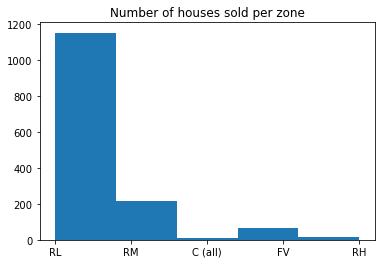

In [28]:
plt.hist(houses.MSZoning, bins=5)
plt.title('Number of houses sold per zone')

RL         1150
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>)

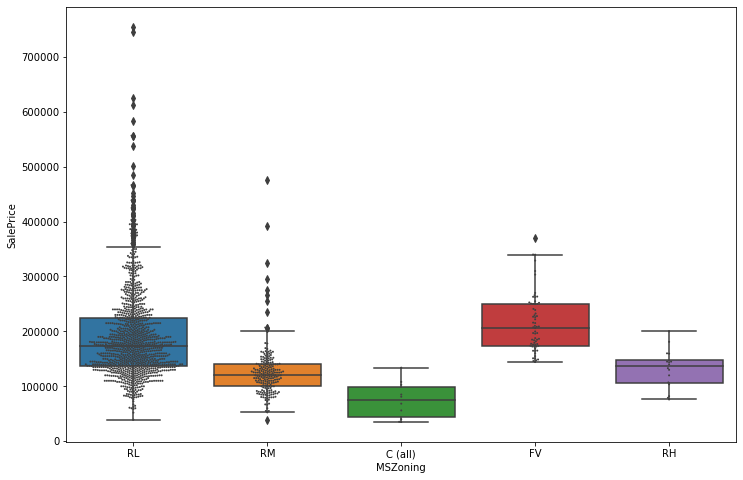

In [29]:
plot_cat('MSZoning')

In [30]:
#df.loc[:, df.columns.str.startswith('MSZoning')]

# Street
whether the street is paved or not

Pave    1453
Grvl       6
Name: Street, dtype: int64


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='Street', ylabel='SalePrice'>)

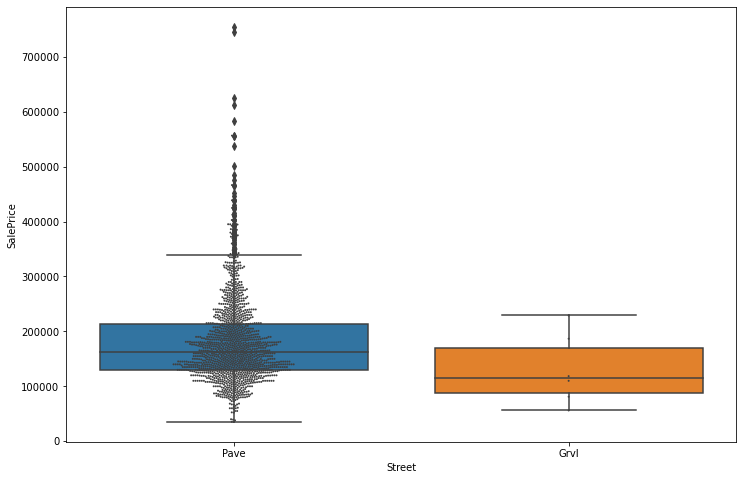

In [31]:
plot_cat('Street')

# Alley
whether there is an alley or not

(array([50., 41.]), array([0. , 0.5, 1. ]), <BarContainer object of 2 artists>)

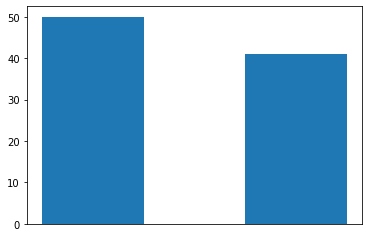

In [32]:
plt.hist(houses.Alley[~houses.Alley.isna()] , bins=2, rwidth=.5)

Grvl    50
Pave    41
Name: Alley, dtype: int64


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='Alley', ylabel='SalePrice'>)

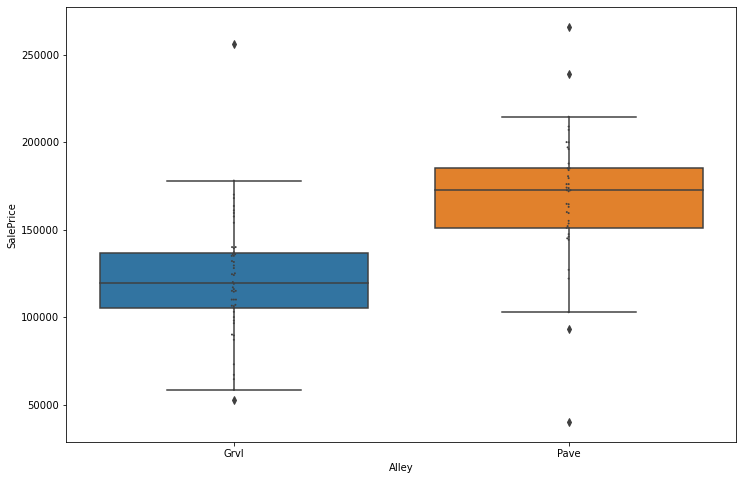

In [33]:
plot_cat('Alley')

# LotShape
General shape of property
       
       Reg - Regular,	
       IR1 - Slightly irregular,
       IR2 - Moderately Irregular,
       IR3 - Irregular,

(array([924.,   0.,   0., 484.,   0.,   0.,  41.,   0.,   0.,  10.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

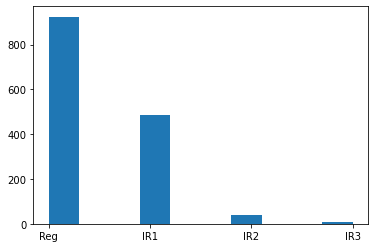

In [34]:
plt.hist(houses.LotShape)

Reg    924
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='LotShape', ylabel='SalePrice'>)

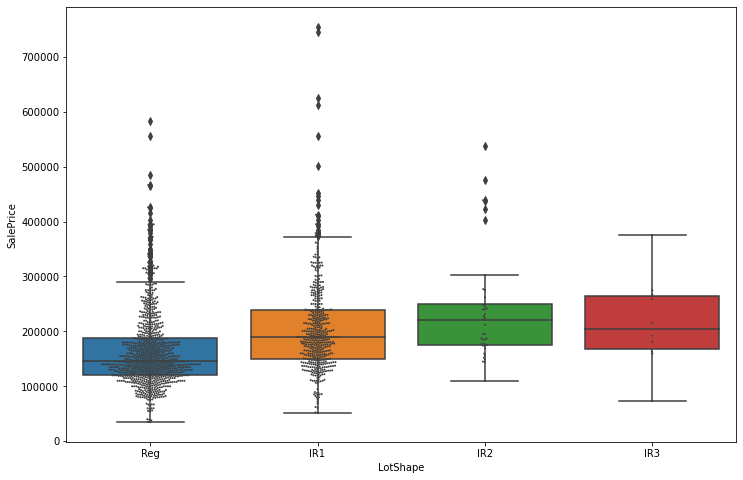

In [35]:
plot_cat('LotShape')

# LandContour
Flatness of the property

Lvl - Near Flat/Level, Bnk - Banked/Quick and significant rise from street grade to building, HLS - Hillside/Significant slope from side to side, Low - Depression

Lvl    1310
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='LandContour', ylabel='SalePrice'>)

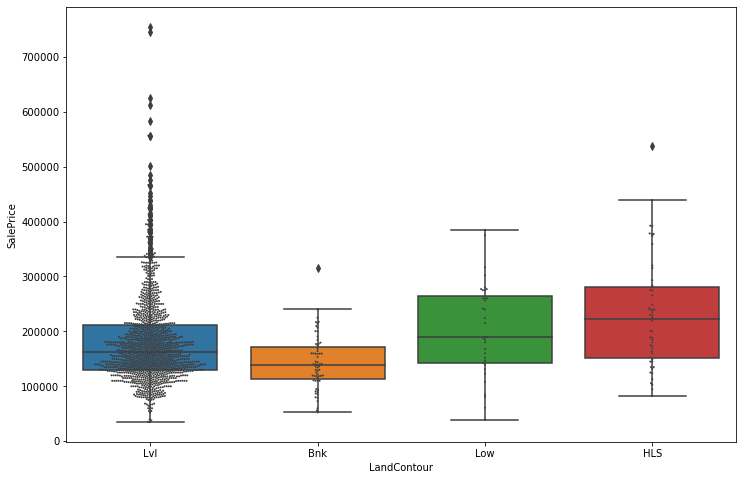

In [36]:
plot_cat('LandContour')

# Utilities
Type of utilities available
		
       AllPub - All public Utilities (E,G,W,& S)	
       NoSewr - Electricity, Gas, and Water (Septic Tank)
       NoSeWa - Electricity and Gas Only
       ELO - Electricity only

AllPub    1458
NoSeWa       1
Name: Utilities, dtype: int64


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='Utilities', ylabel='SalePrice'>)

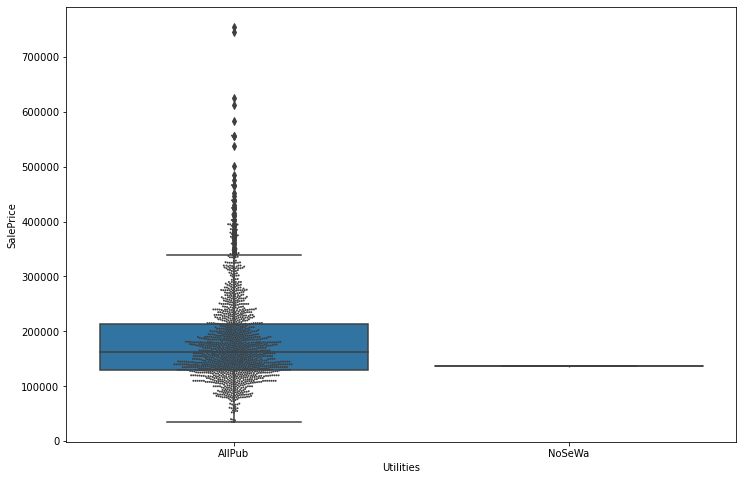

In [37]:
plot_cat('Utilities')

# LotConfig
Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

Inside     1051
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='LotConfig', ylabel='SalePrice'>)

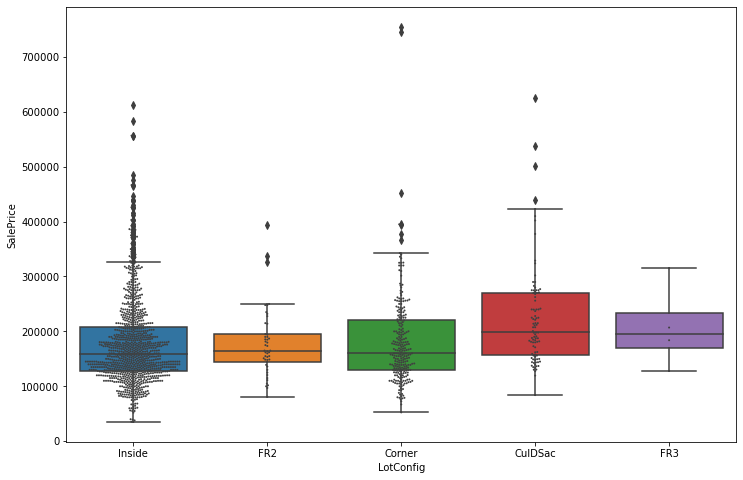

In [38]:
plot_cat('LotConfig')

# LandSlope
Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

Gtl    1381
Mod      65
Sev      13
Name: LandSlope, dtype: int64


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='LandSlope', ylabel='SalePrice'>)

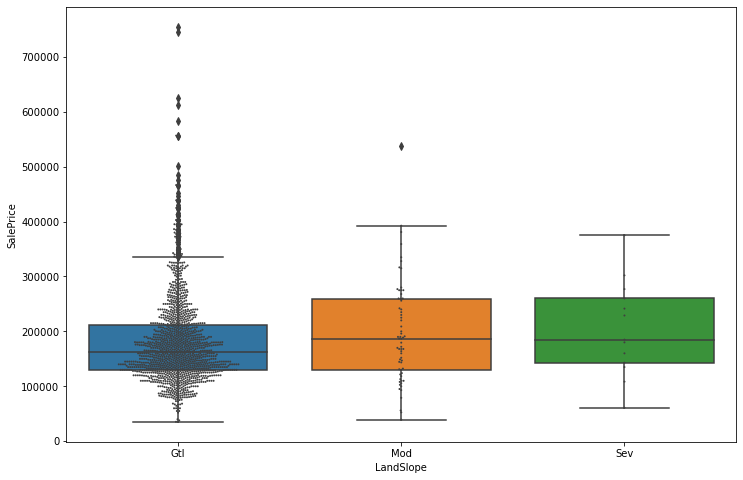

In [39]:
plot_cat('LandSlope')

# Neighborhood
Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
IDOTRR      37
Timber      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


/Users/hopecomella/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 16.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>)

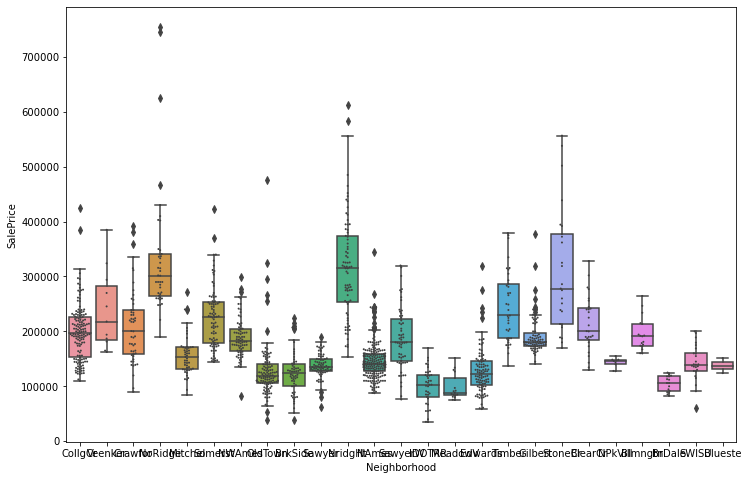

In [40]:
plot_cat('Neighborhood')

# Condition1
Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

Norm      1259
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64


/Users/hopecomella/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='Condition1', ylabel='SalePrice'>)

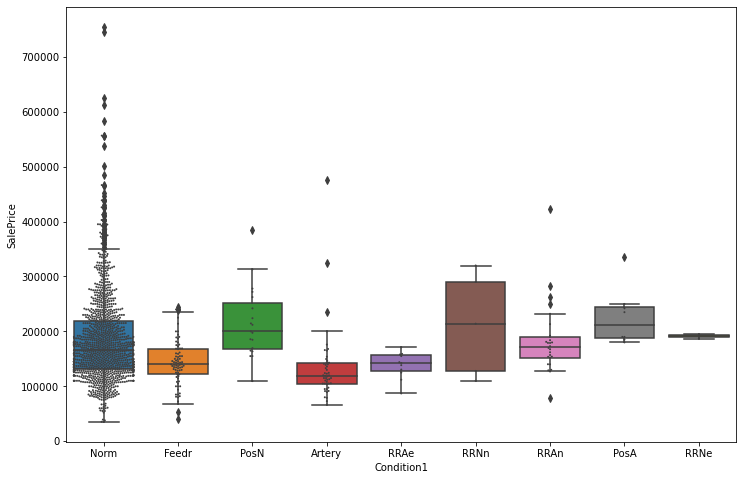

In [41]:
plot_cat('Condition1')

# Condition2
Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

Norm      1444
Feedr        6
Artery       2
PosN         2
RRNn         2
RRAn         1
RRAe         1
PosA         1
Name: Condition2, dtype: int64


/Users/hopecomella/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 11.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='Condition2', ylabel='SalePrice'>)

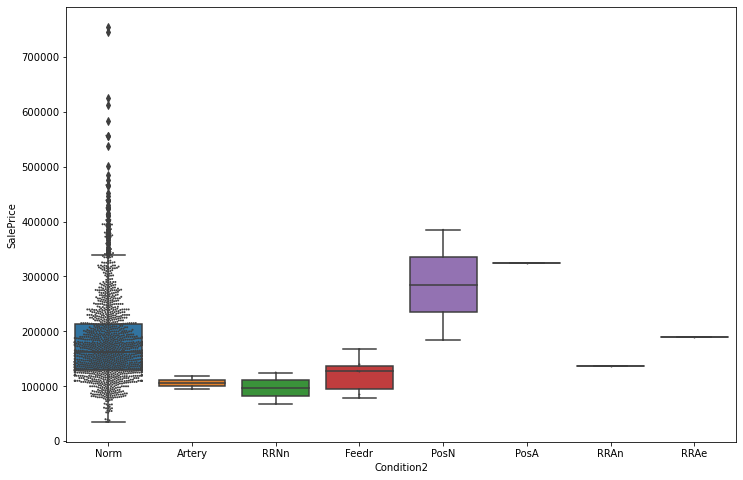

In [42]:
plot_cat('Condition2')

# BldgType
Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

1Fam      1219
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>)

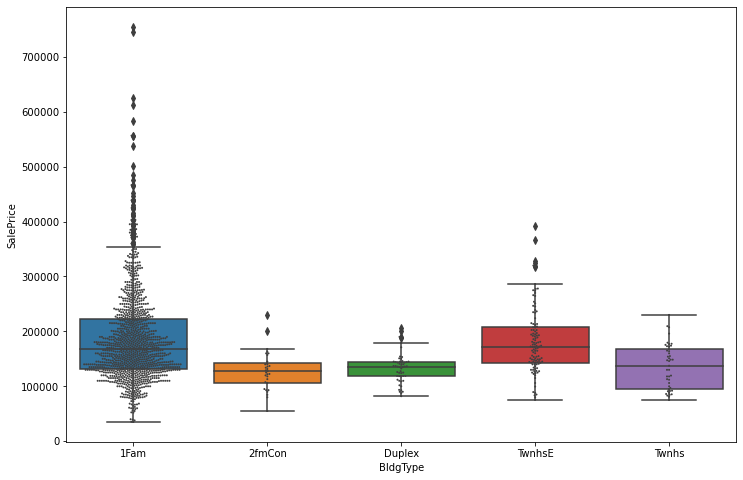

In [43]:
plot_cat('BldgType')

# HouseStyle
Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

1Story    726
2Story    445
1.5Fin    154
SLvl       64
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='HouseStyle', ylabel='SalePrice'>)

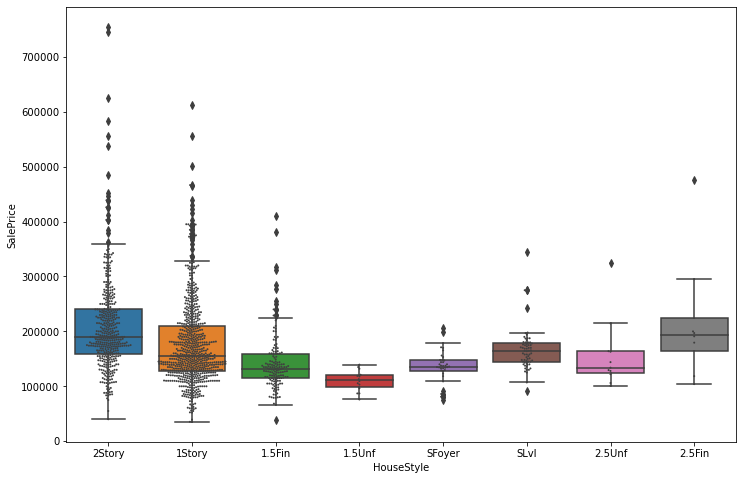

In [44]:
plot_cat('HouseStyle')

# RoofStyle
Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed

Gable      1140
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='RoofStyle', ylabel='SalePrice'>)

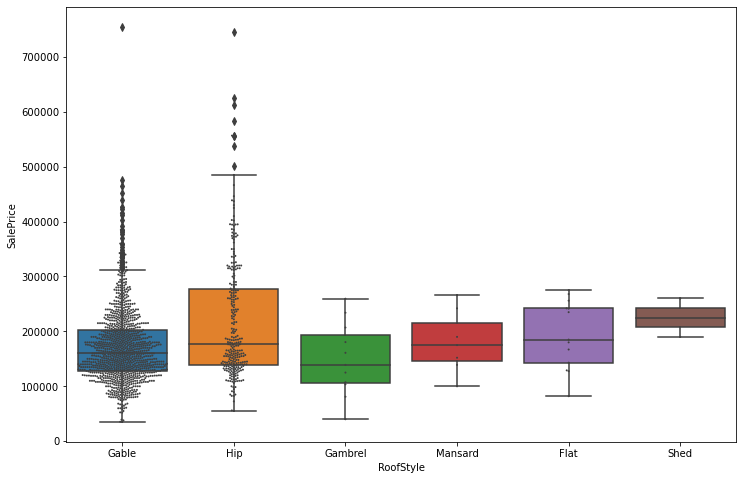

In [45]:
plot_cat('RoofStyle')

# RoofMatl
Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles

CompShg    1433
Tar&Grv      11
WdShngl       6
WdShake       5
Membran       1
Roll          1
ClyTile       1
Metal         1
Name: RoofMatl, dtype: int64


/Users/hopecomella/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='RoofMatl', ylabel='SalePrice'>)

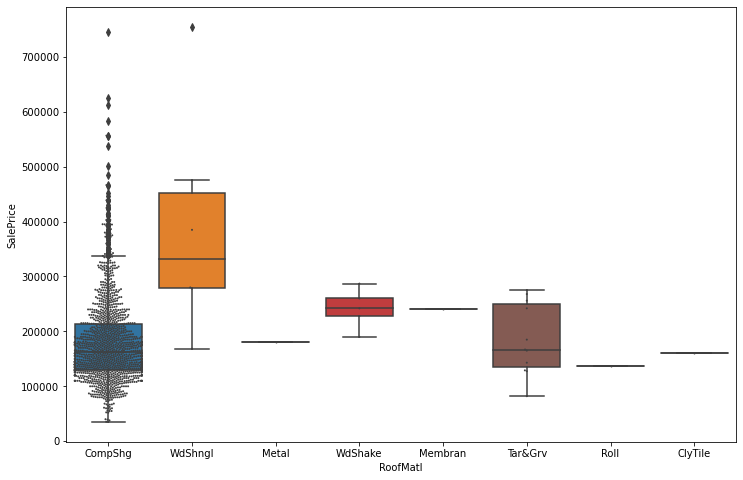

In [46]:
plot_cat('RoofMatl')

# Exterior1st
Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles


VinylSd    514
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
CBlock       1
ImStucc      1
Name: Exterior1st, dtype: int64


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='Exterior1st', ylabel='SalePrice'>)

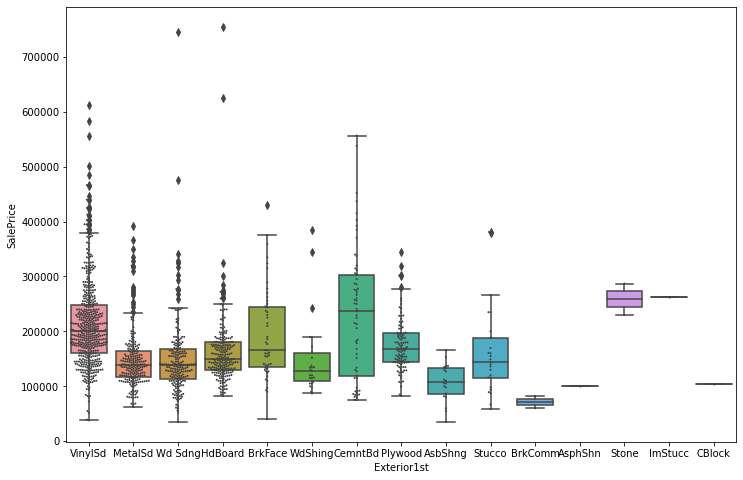

In [47]:
plot_cat('Exterior1st')

# Exterior2nd
Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles


VinylSd    503
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='Exterior2nd', ylabel='SalePrice'>)

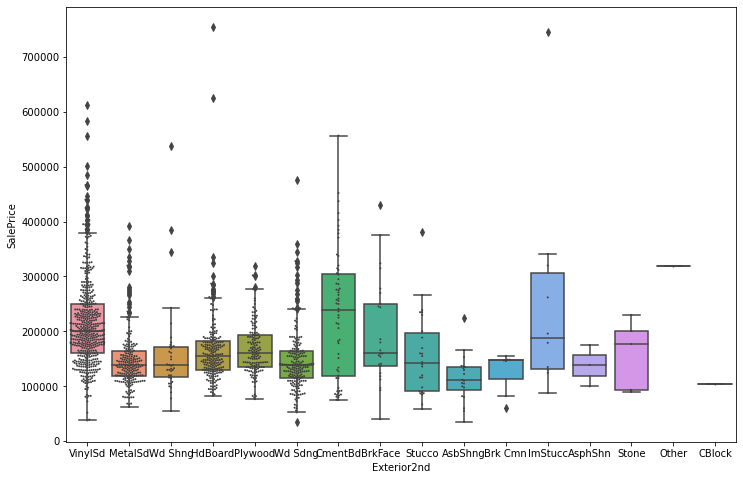

In [48]:
plot_cat('Exterior2nd')

# MasVnrType
Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

None       871
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='MasVnrType', ylabel='SalePrice'>)

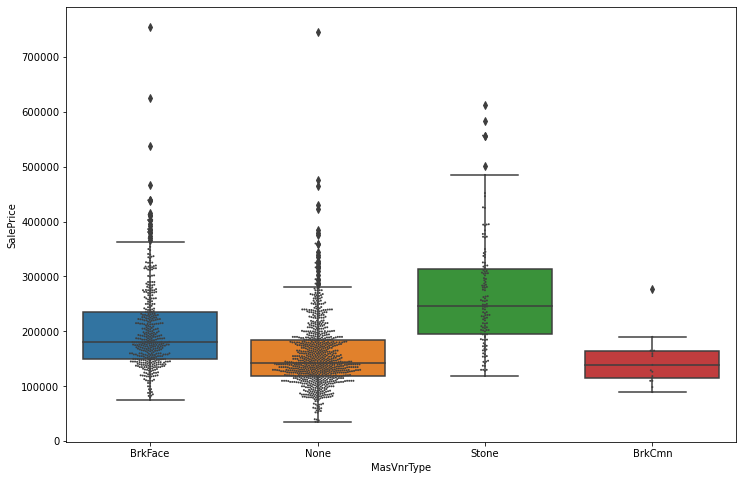

In [49]:
plot_cat('MasVnrType')

# Foundation
Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood

PConc     646
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='Foundation', ylabel='SalePrice'>)

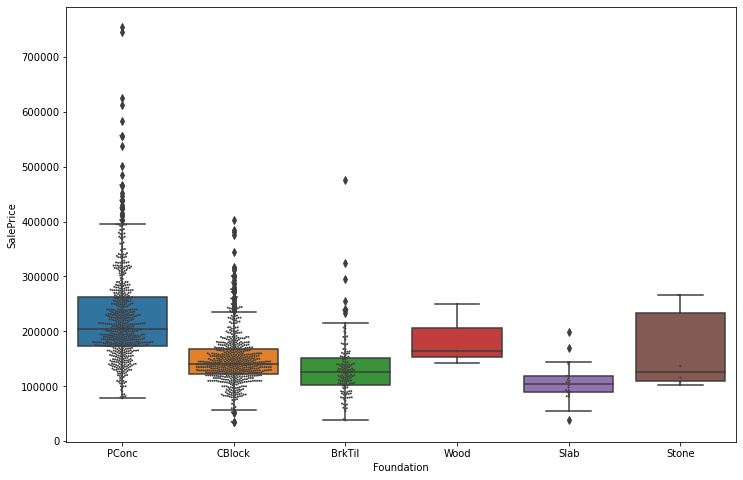

In [50]:
plot_cat('Foundation')

# Heating
Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace


GasA     1427
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='Heating', ylabel='SalePrice'>)

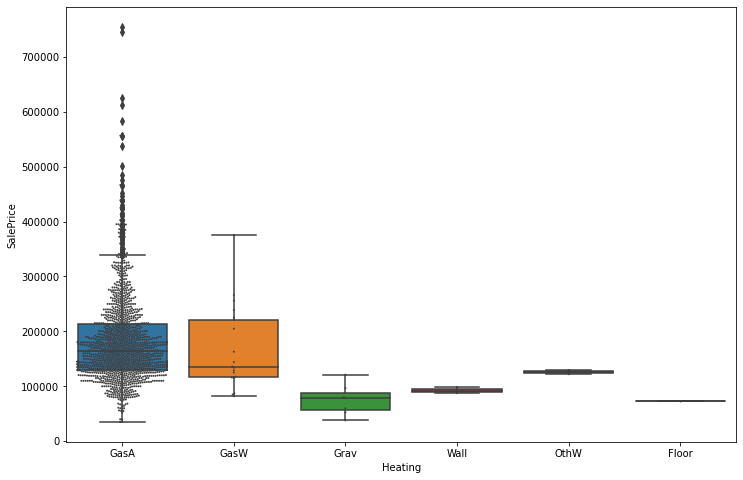

In [51]:
plot_cat('Heating')

# CentralAir
Central air conditioning

       N	No
       Y	Yes

Y    1364
N      95
Name: CentralAir, dtype: int64


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='CentralAir', ylabel='SalePrice'>)

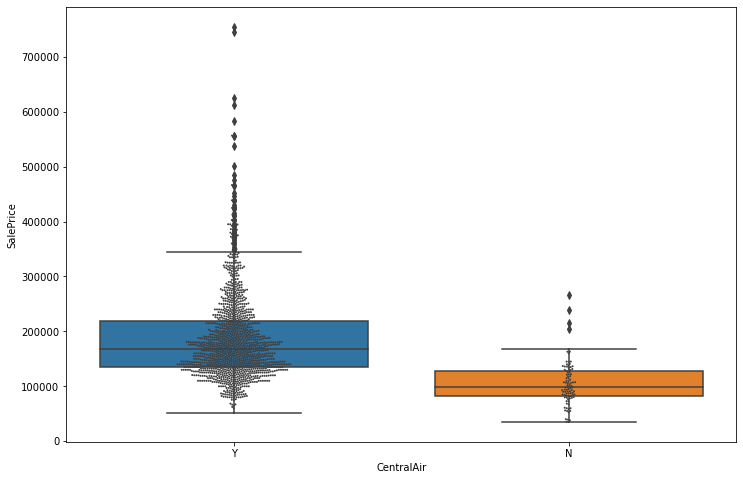

In [52]:
plot_cat('CentralAir')

# Electrical 
 Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='Electrical', ylabel='SalePrice'>)

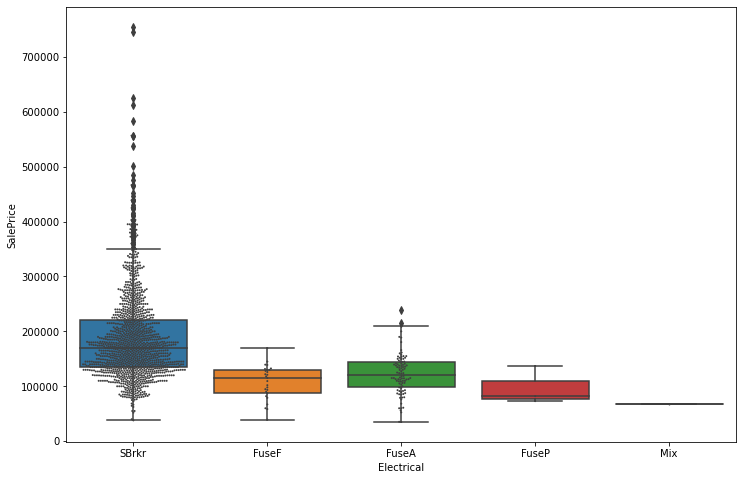

In [53]:
plot_cat('Electrical')

# Functional
Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

Typ     1359
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='Functional', ylabel='SalePrice'>)

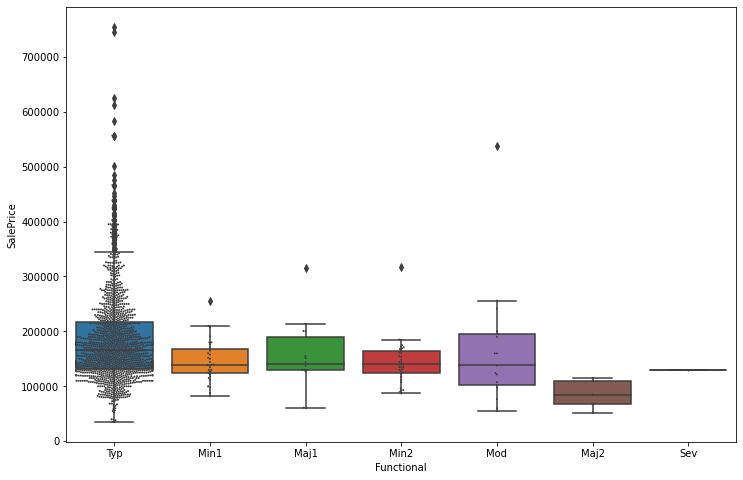

In [54]:
plot_cat('Functional')

# GarageType
Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage


Attchd     870
Detchd     387
BuiltIn     87
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='GarageType', ylabel='SalePrice'>)

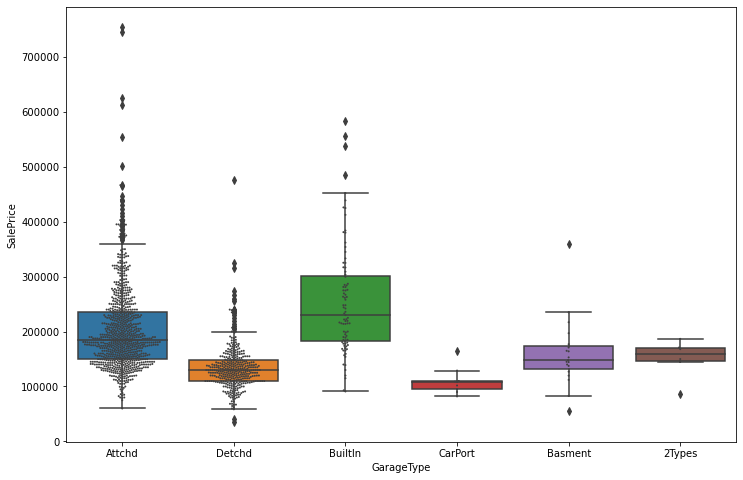

In [55]:
plot_cat('GarageType')

# PavedDrive
Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel

Y    1339
N      90
P      30
Name: PavedDrive, dtype: int64


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='PavedDrive', ylabel='SalePrice'>)

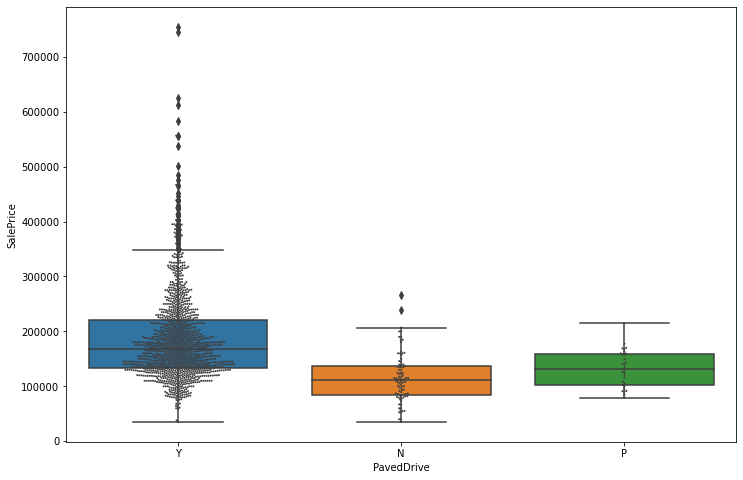

In [56]:
plot_cat('PavedDrive')

# MiscFeature
Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='MiscFeature', ylabel='SalePrice'>)

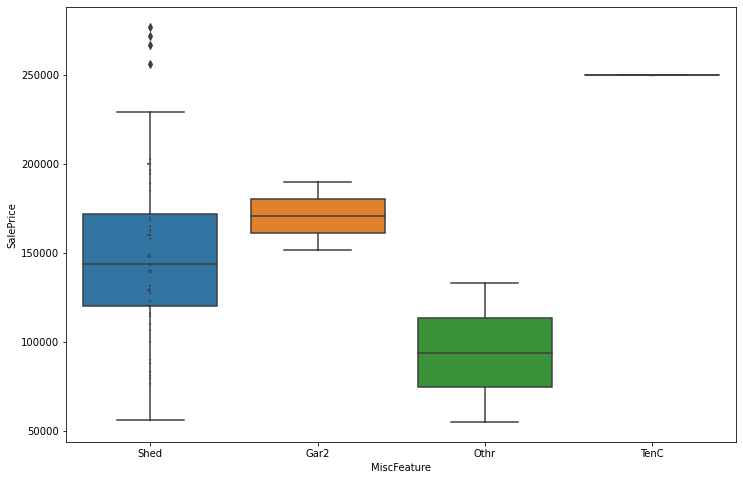

In [57]:
plot_cat('MiscFeature')

# SaleType
Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

WD       1266
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64


/Users/hopecomella/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 12.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='SaleType', ylabel='SalePrice'>)

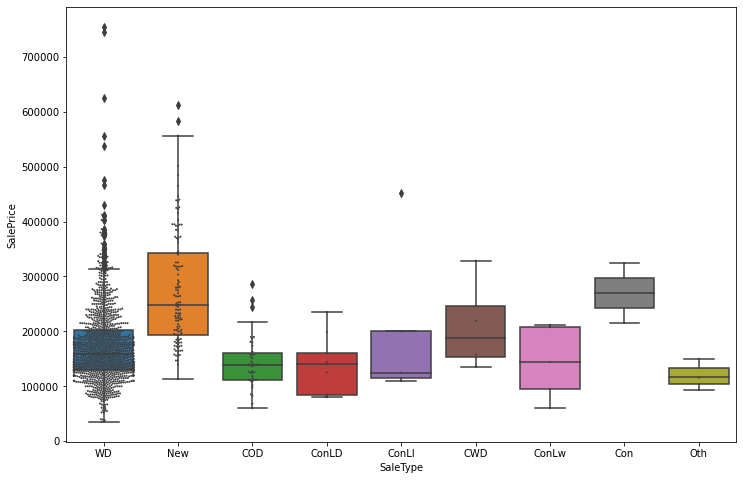

In [58]:
plot_cat('SaleType')

# SaleCondition
Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)


Normal     1197
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='SaleCondition', ylabel='SalePrice'>)

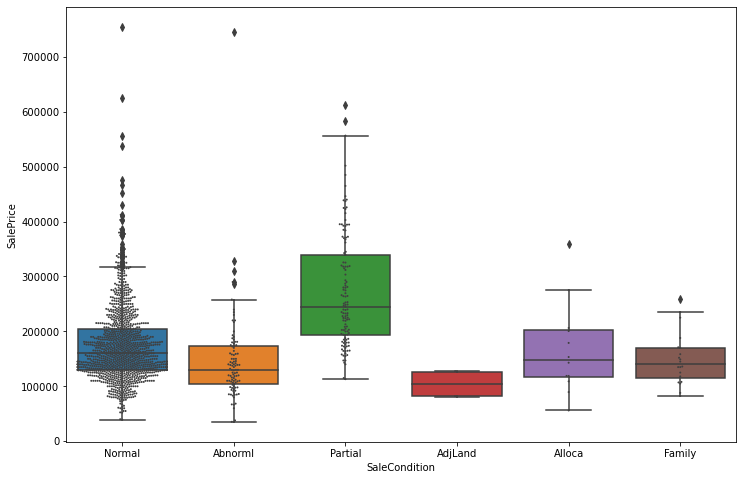

In [59]:
plot_cat('SaleCondition')

In [60]:
houses.corr()['SalePrice'][:50]

Id              -0.021756
MSSubClass      -0.084230
LotFrontage      0.329253
LotArea          0.263837
OverallQual      0.791069
OverallCond     -0.077924
YearBuilt        0.523273
YearRemodAdd     0.507430
MasVnrArea       0.472606
ExterQual        0.682677
ExterCond        0.018872
BsmtQual         0.585349
BsmtCond         0.212624
BsmtExposure     0.374676
BsmtFinType1     0.304923
BsmtFinSF1       0.386436
BsmtFinType2    -0.005355
BsmtFinSF2      -0.011412
BsmtUnfSF        0.214446
TotalBsmtSF      0.613905
HeatingQC        0.427639
1stFlrSF         0.605968
2ndFlrSF         0.319464
LowQualFinSF    -0.025620
GrLivArea        0.708618
BsmtFullBath     0.227082
BsmtHalfBath    -0.016873
FullBath         0.560881
HalfBath         0.284400
BedroomAbvGr     0.168235
KitchenAbvGr    -0.135935
KitchenQual      0.659814
TotRmsAbvGrd     0.533779
Fireplaces       0.466968
FireplaceQu      0.520507
GarageYrBlt      0.508417
GarageFinish     0.549809
GarageCars       0.640473
GarageArea  

In [61]:
df.corr()['SalePrice'][52:110]

MSZoning_C (all)       -0.111268
MSZoning_FV             0.089927
MSZoning_RH            -0.065442
MSZoning_RL             0.245148
MSZoning_RM            -0.288134
Street_Grvl            -0.041043
Street_Pave             0.041043
Alley_Grvl             -0.139220
Alley_Pave             -0.027676
LotShape_IR1            0.223242
LotShape_IR2            0.126079
LotShape_IR3            0.036711
LotShape_Reg           -0.267639
LandContour_Bnk        -0.101152
LandContour_HLS         0.119995
LandContour_Low         0.045511
LandContour_Lvl        -0.027507
Utilities_AllPub        0.014317
Utilities_NoSeWa       -0.014317
LotConfig_Corner        0.004091
LotConfig_CulDSac       0.141792
LotConfig_FR2          -0.006880
LotConfig_FR3           0.018180
LotConfig_Inside       -0.080477
LandSlope_Gtl          -0.051090
LandSlope_Mod           0.042957
LandSlope_Sev           0.027987
Neighborhood_Blmngtn    0.019053
Neighborhood_Blueste   -0.020255
Neighborhood_BrDale    -0.101316
Neighborho

columns with a correlation above .35

OverallQual 0.799106

YearBuilt 0.523273

YearRemodAdd 0.507430

MasVnrArea 0.472606

ExterQual 0.682677

BsmtQual 0.585349

BsmtExposure 0.374676

BsmtFinSF1 0.386436

TotalBsmtSF 0.613905

HeatingQC 0.427639

1stFlrSF 0.605968

GrLivArea 0.708618

FullBath 0.560881

KitchenQual 0.659814

TotRmsAbvGrd 0.533779

Fireplaces 0.466968

FireplaceQu 0.520507

GarageYrBlt 0.508417

GarageFinish 0.549809

GarageCars 0.640473

GarageArea 0.623423




Neighborhood_NridgHt    0.402133

Foundation_PConc       0.498083

SaleType_New           0.357489

SaleCondition_Partial    0.352039

<AxesSubplot:>

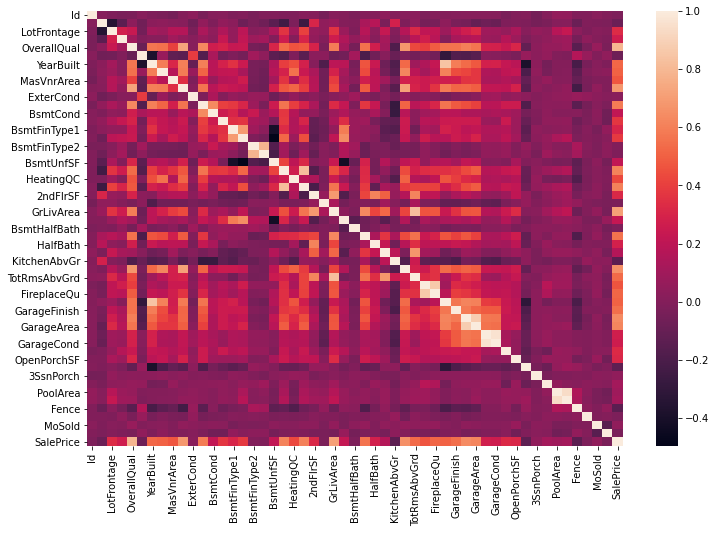

In [62]:
fig = plt.figure(figsize=(12,8))
sns.heatmap(houses.corr())

In [63]:
#sns.pairplot(houses)  

In [64]:
def rel_plot(feature, hue=None):
    fig = plt.figure(figsize=(12,8),)
    ax = sns.relplot(x=feature, y='SalePrice', data=houses, hue=hue)
    return fig, ax

# OverallQual  Corr: 0.799106

Rates the overall material and finish of the house 1-10

(<Figure size 864x576 with 0 Axes>,
 <seaborn.axisgrid.FacetGrid at 0x125d05fd0>)

<Figure size 864x576 with 0 Axes>

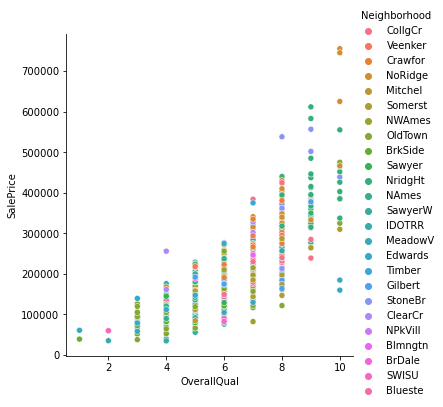

In [65]:
rel_plot('OverallQual', 'Neighborhood')

(<Figure size 864x576 with 0 Axes>,
 <seaborn.axisgrid.FacetGrid at 0x12610bc10>)

<Figure size 864x576 with 0 Axes>

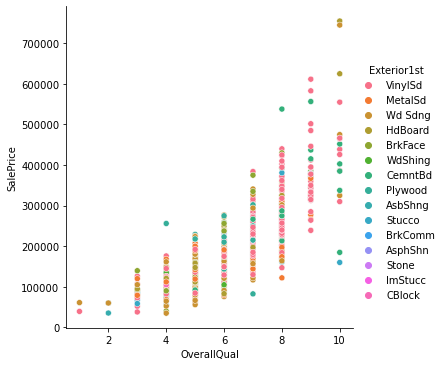

In [66]:
rel_plot('OverallQual', 'Exterior1st')

5     396
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64


/Users/hopecomella/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>)

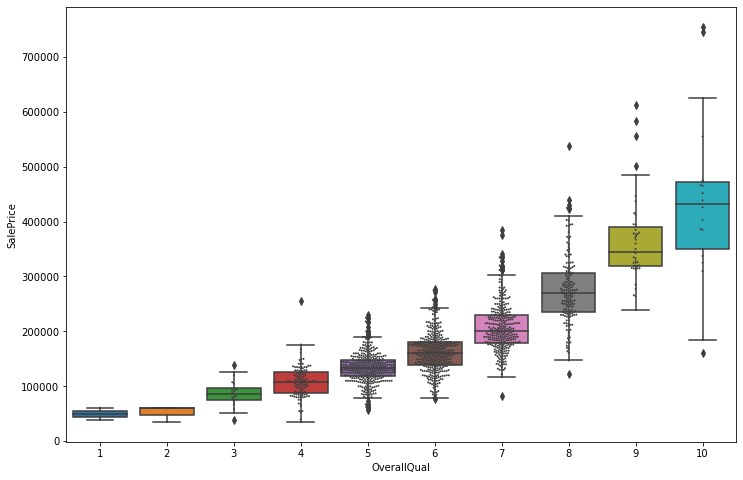

In [67]:
plot_cat('OverallQual')

# YearBuilt corr:0.523273

Original construction date

(<Figure size 864x576 with 0 Axes>,
 <seaborn.axisgrid.FacetGrid at 0x124468fa0>)

<Figure size 864x576 with 0 Axes>

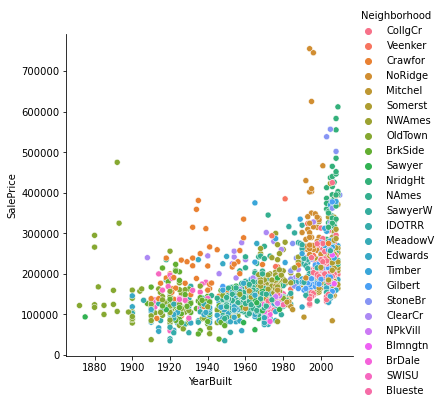

In [68]:
rel_plot('YearBuilt', 'Neighborhood')

# YearRemodAdd corr:0.507430

Remodel date (same as construction date if no remodeling or additions)

(<Figure size 864x576 with 0 Axes>,
 <seaborn.axisgrid.FacetGrid at 0x12538fee0>)

<Figure size 864x576 with 0 Axes>

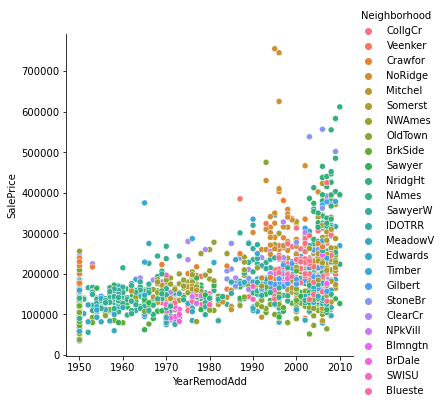

In [69]:
rel_plot('YearRemodAdd', 'Neighborhood')

# MasVnrArea corr:0.472606

Masonry veneer area in square feet

(<Figure size 864x576 with 0 Axes>,
 <seaborn.axisgrid.FacetGrid at 0x126940130>)

<Figure size 864x576 with 0 Axes>

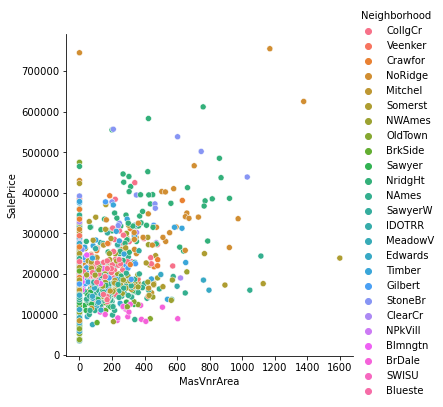

In [70]:
rel_plot('MasVnrArea', 'Neighborhood')

# ExterQual corr:0.682677

Evaluates the quality of the material on the exterior

(<Figure size 864x576 with 0 Axes>,
 <seaborn.axisgrid.FacetGrid at 0x1267a0b50>)

<Figure size 864x576 with 0 Axes>

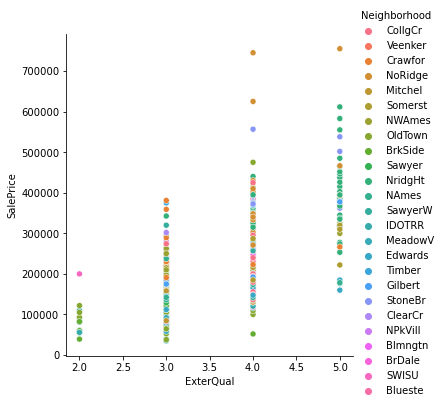

In [71]:
rel_plot('ExterQual', 'Neighborhood')

3    905
4    488
5     52
2     14
Name: ExterQual, dtype: int64


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='ExterQual', ylabel='SalePrice'>)

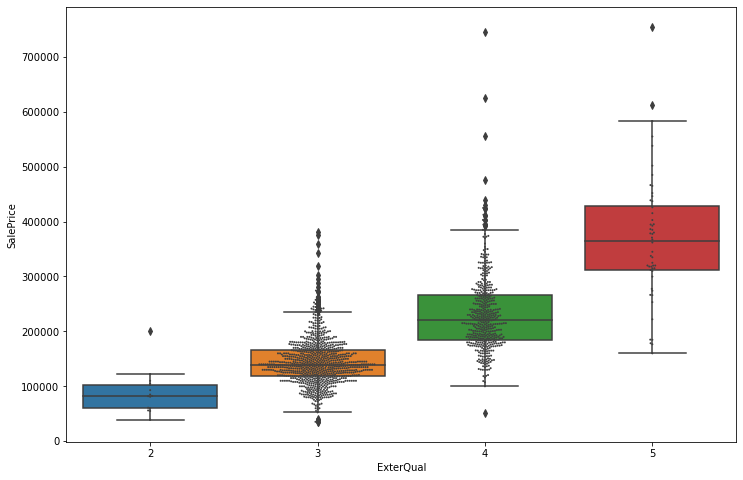

In [72]:
plot_cat('ExterQual')

# BsmtQual corr: 0.585349

Evaluates the height of the basement
   5	Excellent (100+ inches)	
   4	Good (90-99 inches)
    3	Typical (80-89 inches)
    2	Fair (70-79 inches)
    1	Poor (<70 inches
    0	No Basement

(<Figure size 864x576 with 0 Axes>,
 <seaborn.axisgrid.FacetGrid at 0x126dbcdc0>)

<Figure size 864x576 with 0 Axes>

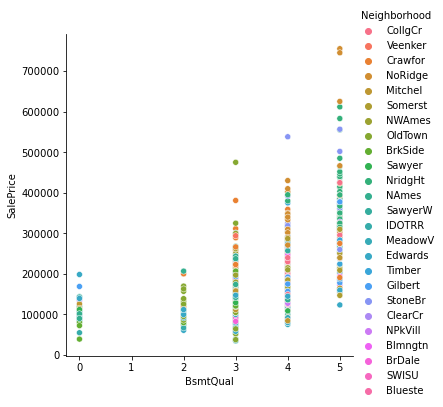

In [73]:
rel_plot('BsmtQual', 'Neighborhood')

3    649
4    617
5    121
0     37
2     35
Name: BsmtQual, dtype: int64


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='BsmtQual', ylabel='SalePrice'>)

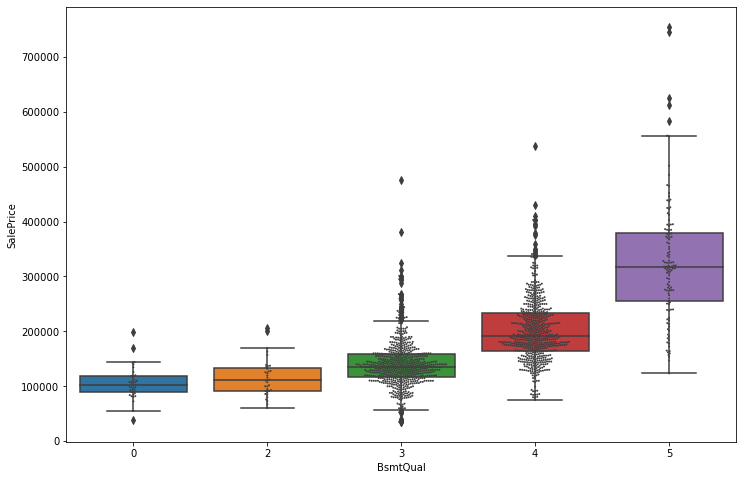

In [74]:
plot_cat('BsmtQual')

# BsmtExposure corr:0.374676

rating refering to walkout or garden level walls 1-5

(<Figure size 864x576 with 0 Axes>,
 <seaborn.axisgrid.FacetGrid at 0x127353be0>)

<Figure size 864x576 with 0 Axes>

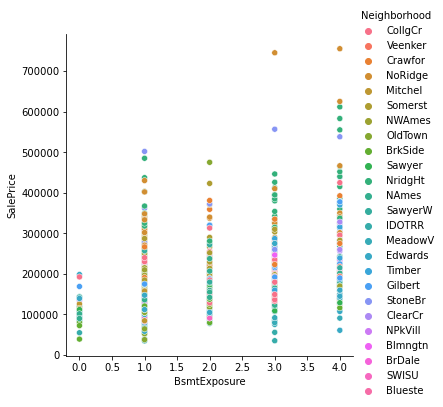

In [75]:
rel_plot('BsmtExposure', 'Neighborhood')

1    952
3    221
4    134
2    114
0     38
Name: BsmtExposure, dtype: int64


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='BsmtExposure', ylabel='SalePrice'>)

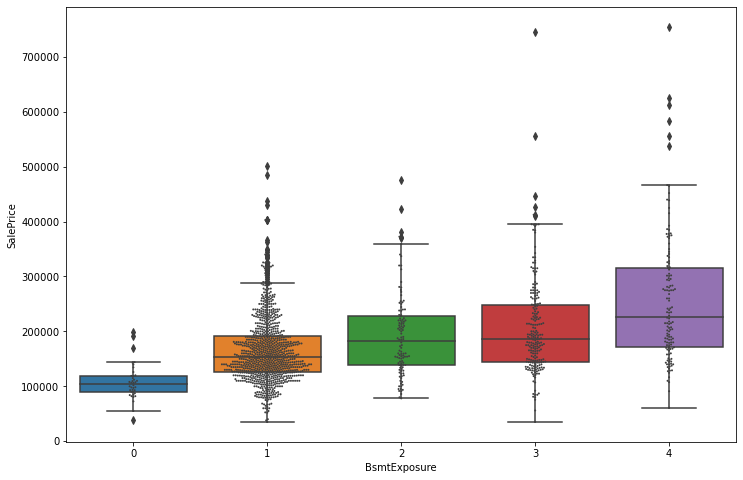

In [76]:
plot_cat('BsmtExposure')

# BsmtFinSF1 corr:0.386436

Rating of basement finished area 1-5

(<Figure size 864x576 with 0 Axes>,
 <seaborn.axisgrid.FacetGrid at 0x1279bfee0>)

<Figure size 864x576 with 0 Axes>

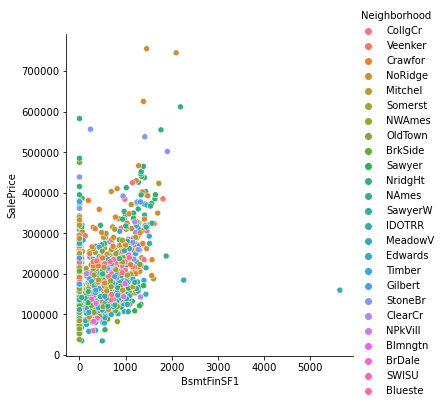

In [77]:
rel_plot('BsmtFinSF1', 'Neighborhood')

# TotalBsmtSF corr:0.613905

Total square feet of basement area

(<Figure size 864x576 with 0 Axes>,
 <seaborn.axisgrid.FacetGrid at 0x1279cab20>)

<Figure size 864x576 with 0 Axes>

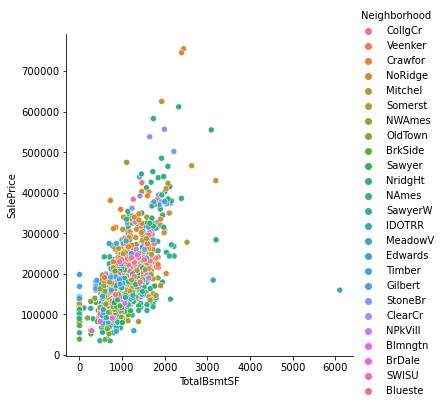

In [78]:
rel_plot('TotalBsmtSF', 'Neighborhood')

# HeatingQC corr:0.427639

Heating quality and condition rating 1-5

(<Figure size 864x576 with 0 Axes>,
 <seaborn.axisgrid.FacetGrid at 0x127e68100>)

<Figure size 864x576 with 0 Axes>

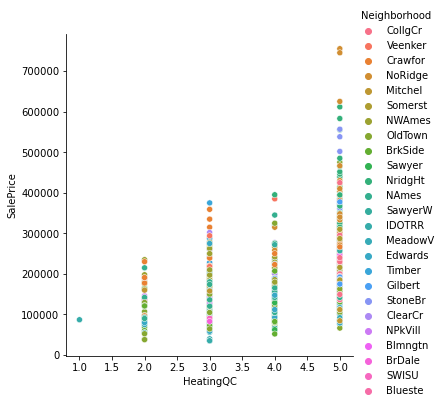

In [79]:
rel_plot('HeatingQC', 'Neighborhood')

5    741
3    428
4    240
2     49
1      1
Name: HeatingQC, dtype: int64


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='HeatingQC', ylabel='SalePrice'>)

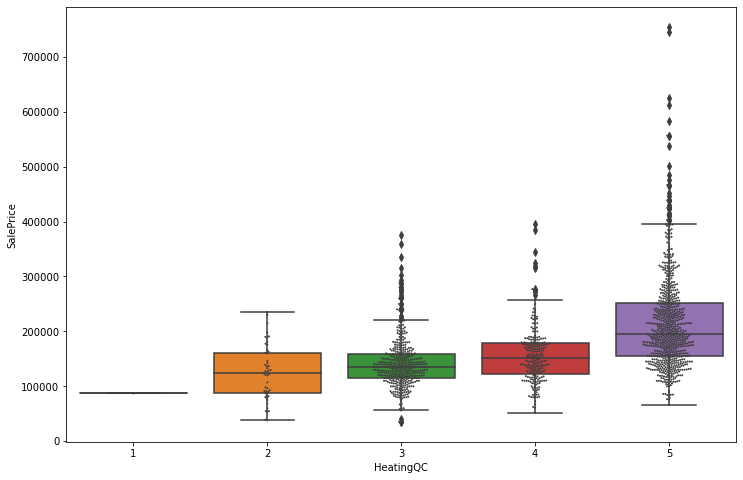

In [80]:
plot_cat('HeatingQC')

# 1stFlrSF corr:0.605968

First Floor square feet

(<Figure size 864x576 with 0 Axes>,
 <seaborn.axisgrid.FacetGrid at 0x127ef56a0>)

<Figure size 864x576 with 0 Axes>

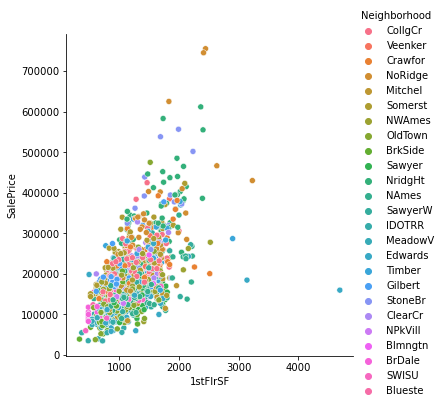

In [81]:
rel_plot('1stFlrSF', 'Neighborhood')

# GrLivArea corr:0.708618

Above grade (ground) living area square feet

(<Figure size 864x576 with 0 Axes>,
 <seaborn.axisgrid.FacetGrid at 0x1286d1f70>)

<Figure size 864x576 with 0 Axes>

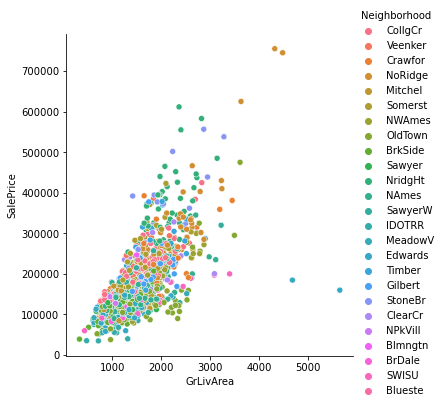

In [82]:
rel_plot('GrLivArea', 'Neighborhood')

# FullBath corr:0.560881

Full bathrooms above grade

(<Figure size 864x576 with 0 Axes>,
 <seaborn.axisgrid.FacetGrid at 0x1288508b0>)

<Figure size 864x576 with 0 Axes>

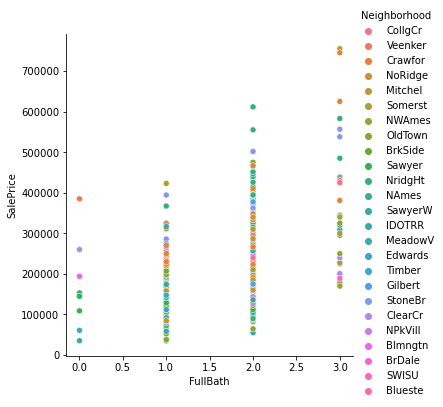

In [83]:
rel_plot('FullBath', 'Neighborhood')

2    767
1    650
3     33
0      9
Name: FullBath, dtype: int64


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>)

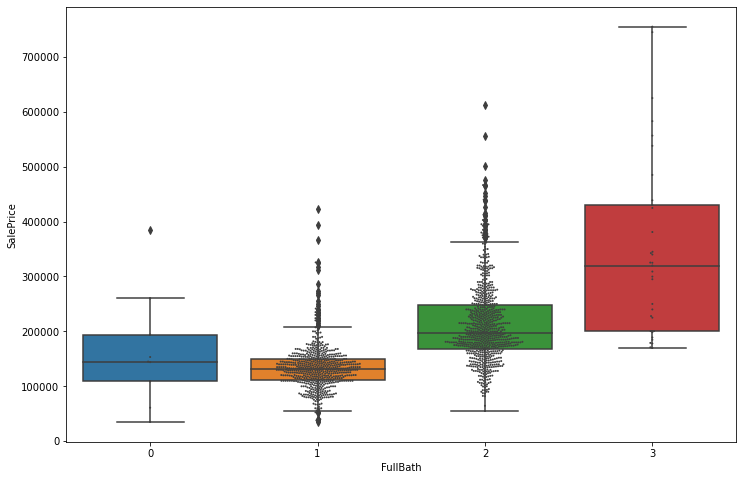

In [84]:
plot_cat('FullBath')

# KitchenQual corr:0.659814

Kitchen quality rateing 1-5

(<Figure size 864x576 with 0 Axes>,
 <seaborn.axisgrid.FacetGrid at 0x128cb44f0>)

<Figure size 864x576 with 0 Axes>

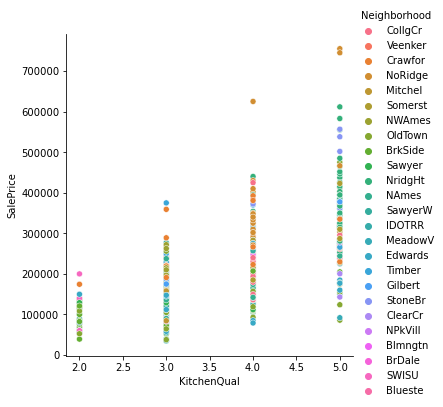

In [85]:
rel_plot('KitchenQual', 'Neighborhood')

3    735
4    585
5    100
2     39
Name: KitchenQual, dtype: int64


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='KitchenQual', ylabel='SalePrice'>)

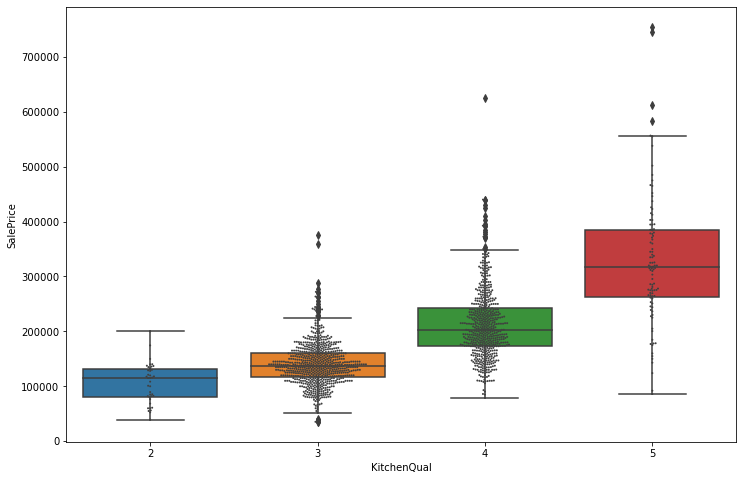

In [86]:
plot_cat('KitchenQual')

# TotRmsAbvGrd corr:0.533779

total rooms above grade (does not include bathrooms)

(<Figure size 864x576 with 0 Axes>,
 <seaborn.axisgrid.FacetGrid at 0x12919ea90>)

<Figure size 864x576 with 0 Axes>

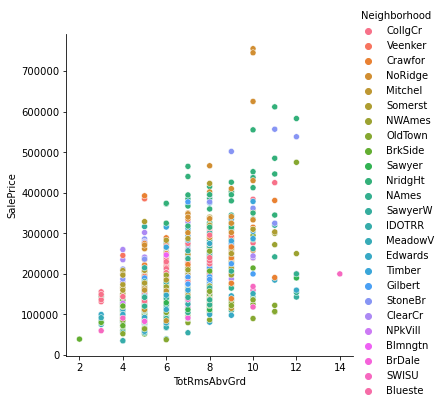

In [87]:
rel_plot('TotRmsAbvGrd', 'Neighborhood')

6     402
7     328
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>)

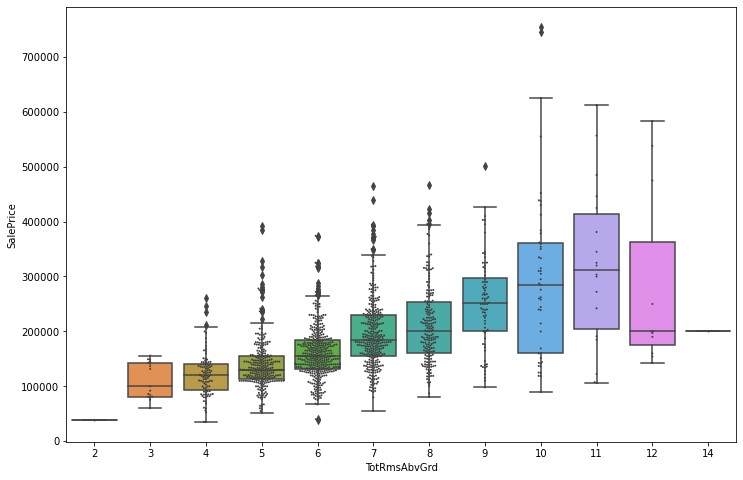

In [88]:
plot_cat('TotRmsAbvGrd')

# Fireplaces corr:0.466968

Number of fireplaces

(<Figure size 864x576 with 0 Axes>,
 <seaborn.axisgrid.FacetGrid at 0x129755f40>)

<Figure size 864x576 with 0 Axes>

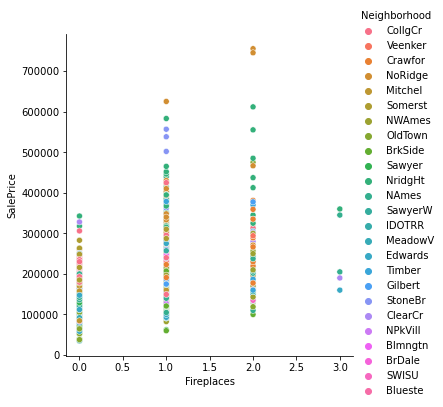

In [89]:
rel_plot('Fireplaces', 'Neighborhood')

0    689
1    650
2    115
3      5
Name: Fireplaces, dtype: int64


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='Fireplaces', ylabel='SalePrice'>)

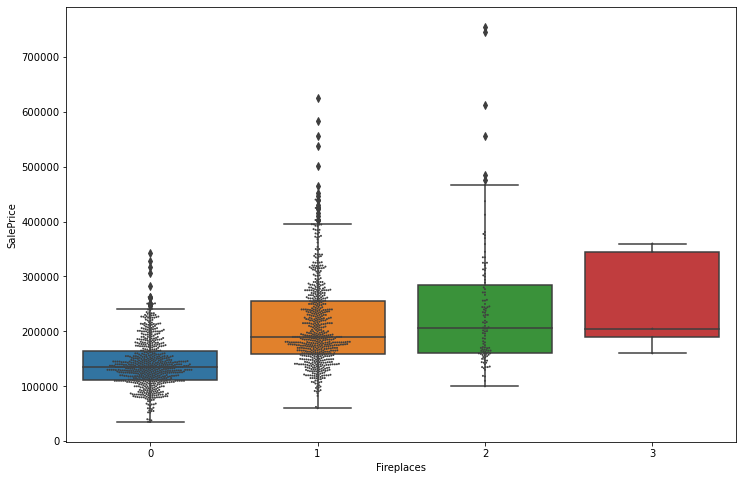

In [90]:
plot_cat('Fireplaces')

# FireplaceQu 0.520507

Fireplace quality rating 1-5

(<Figure size 864x576 with 0 Axes>,
 <seaborn.axisgrid.FacetGrid at 0x129ae1d60>)

<Figure size 864x576 with 0 Axes>

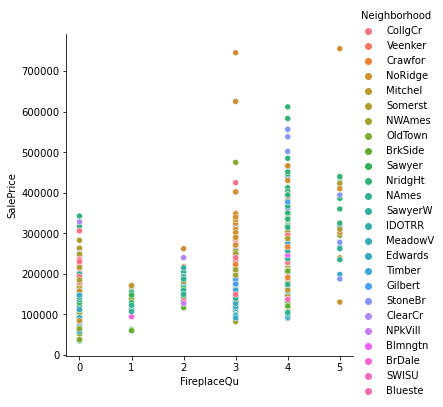

In [91]:
rel_plot('FireplaceQu', 'Neighborhood')

0    689
4    380
3    313
2     33
5     24
1     20
Name: FireplaceQu, dtype: int64


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='FireplaceQu', ylabel='SalePrice'>)

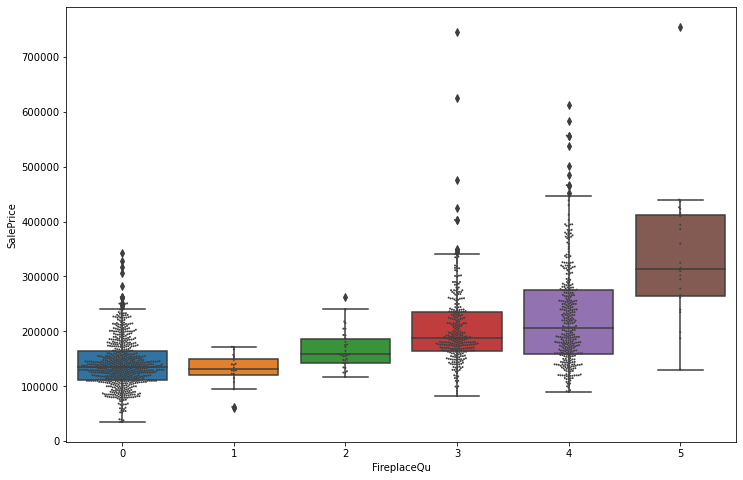

In [92]:
plot_cat('FireplaceQu')

# GarageYrBlt corr:0.508417
Year garage was built if no garage year house was built

(<Figure size 864x576 with 0 Axes>,
 <seaborn.axisgrid.FacetGrid at 0x129f40190>)

<Figure size 864x576 with 0 Axes>

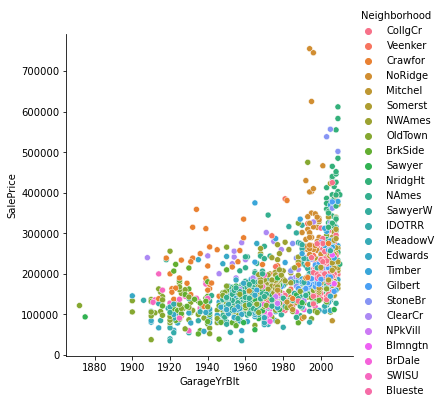

In [93]:
rel_plot('GarageYrBlt', 'Neighborhood')

# GarageFinish 0.549809
Interior finish of the garage rating 1-3

(<Figure size 864x576 with 0 Axes>,
 <seaborn.axisgrid.FacetGrid at 0x12a45a520>)

<Figure size 864x576 with 0 Axes>

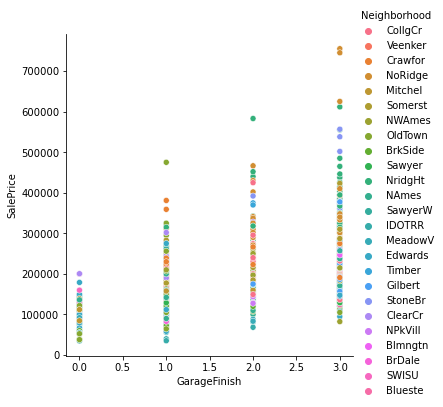

In [94]:
rel_plot('GarageFinish', 'Neighborhood')

1    605
2    422
3    351
0     81
Name: GarageFinish, dtype: int64


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='GarageFinish', ylabel='SalePrice'>)

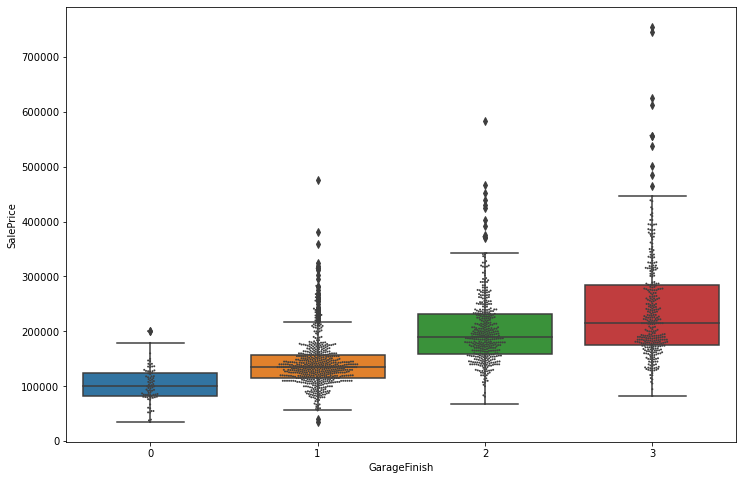

In [95]:
plot_cat('GarageFinish')

# GarageCars corr:0.640473

Size of garage in car capacity

(<Figure size 864x576 with 0 Axes>,
 <seaborn.axisgrid.FacetGrid at 0x12a68b0d0>)

<Figure size 864x576 with 0 Axes>

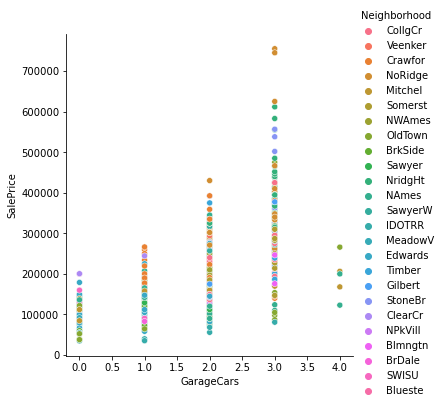

In [96]:
rel_plot('GarageCars', 'Neighborhood')

2    823
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64


(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>)

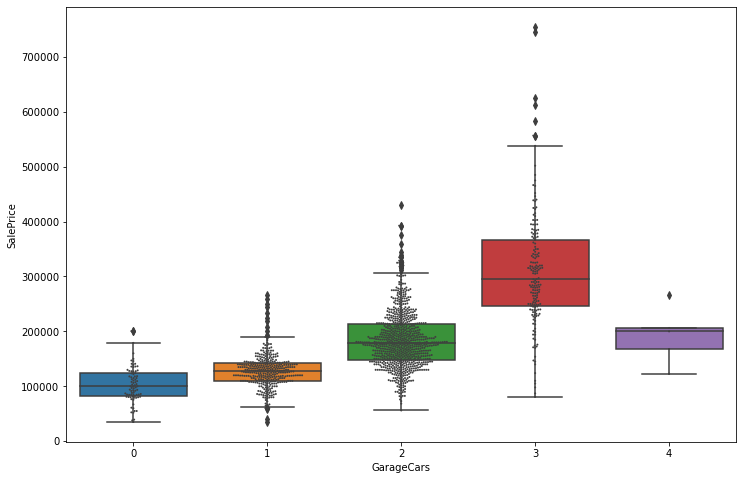

In [97]:
plot_cat('GarageCars')

# GarageArea corr:0.623423

Size of garage in square feet

(<Figure size 864x576 with 0 Axes>,
 <seaborn.axisgrid.FacetGrid at 0x12ad79f10>)

<Figure size 864x576 with 0 Axes>

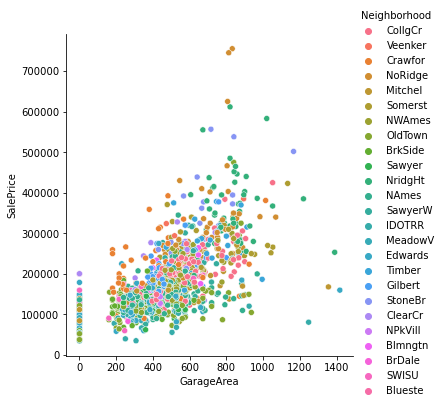

In [98]:
rel_plot('GarageArea', 'Neighborhood')

# Neighborhood_NridgHt 0.402133

(<Figure size 864x576 with 0 Axes>,
 <seaborn.axisgrid.FacetGrid at 0x12ad79550>)

<Figure size 864x576 with 0 Axes>

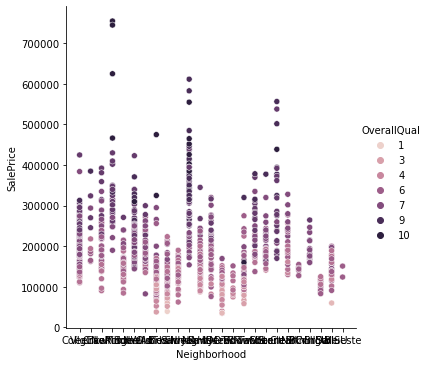

In [99]:
rel_plot('Neighborhood', 'OverallQual')

# Foundation_PConc 0.498083

(<Figure size 864x576 with 0 Axes>,
 <seaborn.axisgrid.FacetGrid at 0x12ad95340>)

<Figure size 864x576 with 0 Axes>

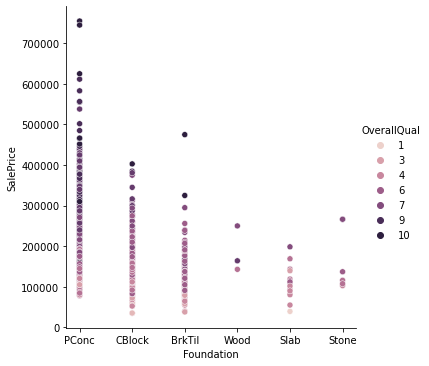

In [100]:
rel_plot('Foundation', 'OverallQual')